In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sample Data

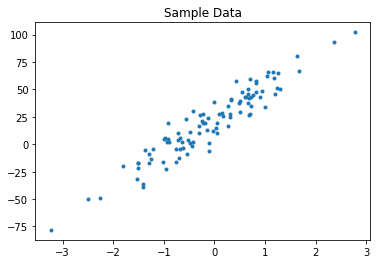

In [2]:
M = 100
X = np.random.normal(0, size=M)
T0 = 21
T1 = 30
noise = 10*np.random.normal(0, size=M)
Y = T1*X + T0 + noise
plt.plot(X, Y, '.')
plt.title('Sample Data')

# Cost Function

$J(\theta_0, \theta_1) = \frac{1}{2}\sum_i{(h(x_i) - y_i)^2}$

where

$h(x) = \theta_0 + \theta_1 y$

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

n_samples = 50
J = np.zeros((n_samples, n_samples))
theta0_options = np.linspace(10, 30, n_samples)
theta1_options = np.linspace(20, 40, n_samples)
for i, theta0 in enumerate(theta0_options):
    for j, theta1 in enumerate(theta1_options):
        J[i, j] = cost(theta0, theta1)

        
plt.imshow(J, cmap='RdBu')
plt.title('Square Error Space')

In [4]:
# Best spot from the above comprhensive search
row = int(np.argmin(J) / 50)
col = int(np.argmin(J) % 50)
best_t0 = theta0_options[row]
best_t1 = theta1_options[col]
best_t0, best_t1

(22.653061224489797, 29.795918367346939)

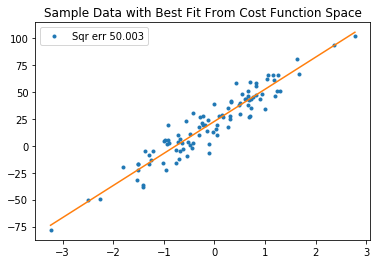

In [5]:
plt.plot(X, Y, '.')
X_sorted = np.sort(X)
plt.plot(X_sorted, best_t0 + best_t1*X_sorted)
plt.title('Sample Data with Best Fit From Cost Function Space')
plt.legend(['Sqr err {0:.5}'.format(sqr_err(best_t0, best_t1))])

# Gradient Descent

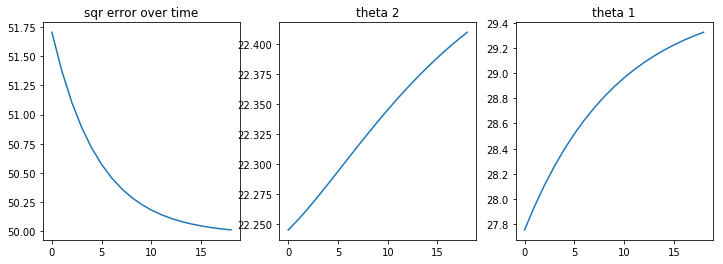

In [22]:
LEARNING_RATE = 0.1
CONVERGENCE = 0.0001

# Starting params
t0 = np.random.choice(theta0_options)
t1 = np.random.choice(theta1_options)

errs = [sqr_err(t0, t1)]
t0s = [t0]
t1s = [t1]
while True:
    Y_hat = t0 + t1*X
    
    t0_new = t0 - LEARNING_RATE * np.sum(Y_hat - Y) / M
    t0s.append(t0_new)
    
    t1_new = t1 - LEARNING_RATE * np.sum(np.multiply(Y_hat - Y, X)) / M
    t1s.append(t1_new)
    
    err_old = sqr_err(t0, t1)
    err_new = sqr_err(t0_new, t1_new)
    errs.append(err_new)
    
    t0 = t0_new
    t1 = t1_new
    
    if (err_old - err_new)**2 < CONVERGENCE:
        break

t0_gradient = t0
t1_gradient = t1
        
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(np.arange(len(errs)), errs)
plt.title('sqr error over time')

plt.subplot(1, 3, 2)
plt.plot(np.arange(len(t0s)), t0s)
plt.title('theta 2')

plt.subplot(1, 3, 3)
plt.plot(np.arange(len(t1s)), t1s)
plt.title('theta 1')

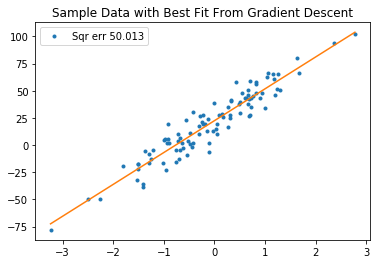

In [23]:
plt.plot(X, Y, '.')
X_sorted = np.sort(X)
plt.plot(X_sorted, t0_gradient + t1_gradient*X_sorted)
plt.title('Sample Data with Best Fit From Gradient Descent')
plt.legend(['Sqr err {0:.5}'.format(sqr_err(t0_gradient, t1_gradient))])